# Contour Hierarchy

[09:48:29] INFO - Showing image ... (5.07 x 3.41)
[09:48:29] INFO - Showing image ... (5.07 x 3.41)


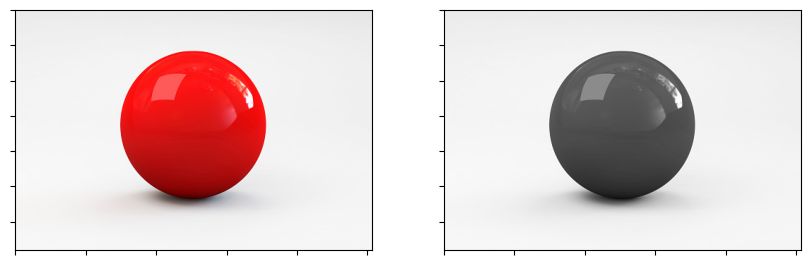

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from custom_utils import *

import logging
logging.basicConfig(
    #  filename='log_file_name.log',
     level=logging.INFO, 
     format= '[%(asctime)s] %(levelname)s - %(message)s',
     datefmt='%H:%M:%S'
)

height, width, img, img_rgb, img_gray = load_image_and_show('../data/redball.jpeg')

[09:50:11] INFO - Showing image ... (5.07 x 3.41)


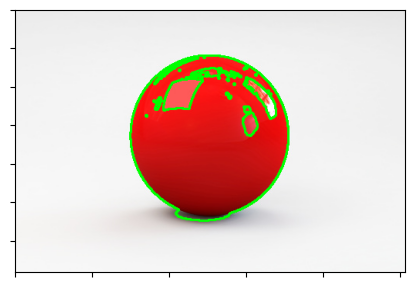

In [7]:
# edge detection filter
# from https://pythonexamples.org/python-opencv-image-filter-convolution-cv2-filter2d/
kernel = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 4.0, -1.0],
                   [0.0, -1.0, 0.0]])

kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)
_, img_rst = cv.threshold(
    img_gray,
    100,
    255,
    cv.THRESH_BINARY_INV
)

contours, hierarchy = cv.findContours(img_rst, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

show_image(
    cv.drawContours(
        img_rgb.copy(), contours, -1, (0, 255, 0), 2
    )
)

In [16]:
?cv.findContours

Docstring:
findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy
.   @brief Finds contours in a binary image.
.   
.   The function retrieves contours from the binary image using the algorithm @cite Suzuki85 . The contours
.   are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the
.   OpenCV sample directory.
.   @note Since opencv 3.2 source image is not modified by this function.
.   
.   @param image Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero
.   pixels remain 0's, so the image is treated as binary . You can use #compare, #inRange, #threshold ,
.   #adaptiveThreshold, #Canny, and others to create a binary image out of a grayscale or color one.
.   If mode equals to #RETR_CCOMP or #RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1).
.   @param contours Detected contours. Each contour is stored as a vector of points (e.g.
.   std::vector<

## Studying retrieval methods more deeply ...

In [54]:
retrieval_methods = [retr for retr in dir(cv) if 'RETR' in retr]
retrieval_methods

['RETR_CCOMP', 'RETR_EXTERNAL', 'RETR_FLOODFILL', 'RETR_LIST', 'RETR_TREE']

### RETR_LIST

- retrieves all contours, no parent-child relationships

[10:59:54] INFO - Showing image ... (5.07 x 3.41)


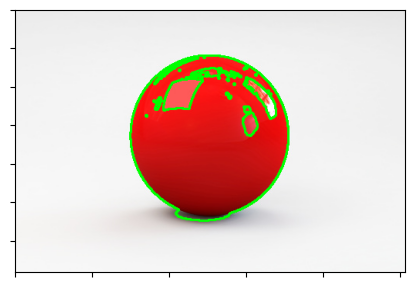

In [71]:
contours, hierarchy = cv.findContours(img_rst, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

show_image(
    cv.drawContours(
        img_rgb.copy(), contours, -1, (0, 255, 0), 2
    )
)

In [70]:
hierarchy[:, :, 3]

array([[-1, -1, -1, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3]], dtype=int32)

### RETR_EXTERNAL 

Only extreme outer flags

[11:00:09] INFO - Showing image ... (5.07 x 3.41)


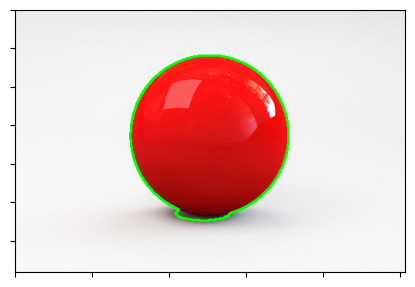

In [72]:
contours, hierarchy = cv.findContours(img_rst, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

show_image(
    cv.drawContours(
        img_rgb.copy(), contours, -1, (0, 255, 0), 2
    )
)

In [61]:
hierarchy

array([[[-1, -1, -1, -1]]], dtype=int32)

### RETR_CCOMP

- retrieves all contours and organizes them into a two-level hierarchy

[11:00:20] INFO - Showing image ... (5.07 x 3.41)


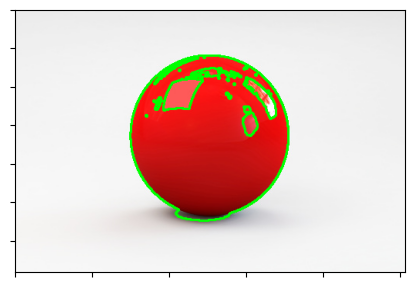

In [73]:
contours, hierarchy = cv.findContours(img_rst, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

show_image(
    cv.drawContours(
        img_rgb.copy(), contours, -1, (0, 255, 0), 2
    )
)

In [68]:
hierarchy[:, :, 3]

array([[-1, -1, -1, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3]], dtype=int32)

### RETR_TREE

- retrieves all contours and reconstructs a full hierarchy of nested contours

[11:01:06] INFO - Showing image ... (5.07 x 3.41)


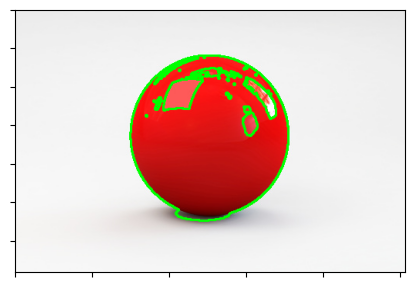

In [74]:
contours, hierarchy = cv.findContours(img_rst, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

show_image(
    cv.drawContours(
        img_rgb.copy(), contours, -1, (0, 255, 0), 2
    )
)

In [75]:
hierarchy[:, :, 3]

array([[-1,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0, 21, 21,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int32)